In [211]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Fourier Transform (FT)

The fourier transform, used to go to the time domain to the frequency domain, is defined as follows:

$$ X(f) = \int x(t) \cdot e^{-j2 \pi ft} \cdot dt $$

Where x(t) is the time domain signal, X(f) the fourier transform, t is the time, f is the frequency and j the imaginary unit.
To return to the time domain from frequency (aside from scaling factor and sign), we can use the next anti-transformation:

$$ x(t) = \frac{1}{2\pi} \int X(f) \cdot e^{j2 \pi ft} \cdot df $$

# Discrete Fourier Transform (DFT)

$$ X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-\frac{j2\pi}{N}kn}$$

# Fast Fourier Transform (FFT)

 The Fast Fourier Transform (FFT) is an algorithm to compute the Discrete Fourier Transform (DFT).
 FFT is $O(N\log N)$ while a DFT is $O(N^2)$.

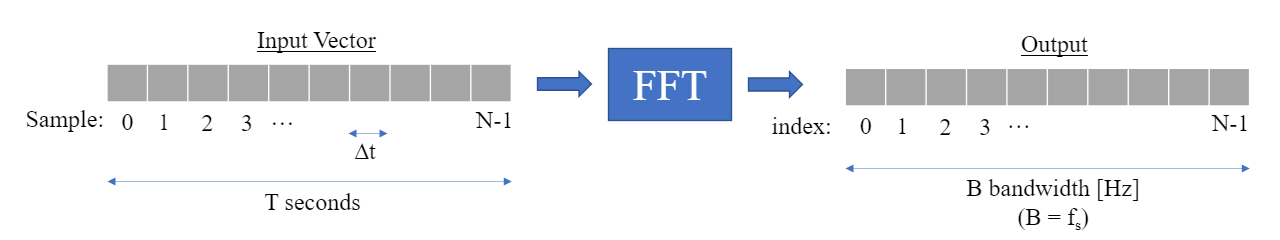

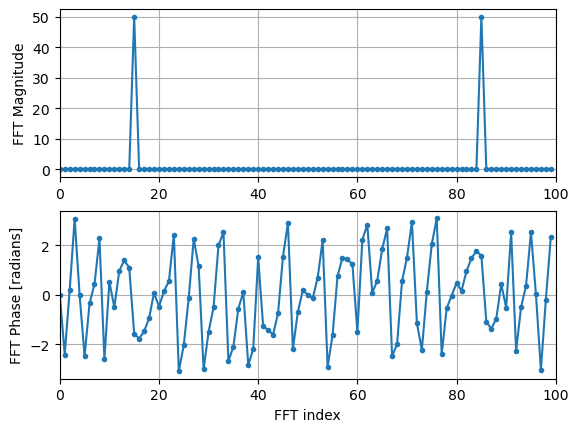

In [212]:
N = 100
fc = 0.15

k = np.arange(N)
x = np.sin(2*pi*fc*k)
X = np.fft.fft(x)
Xmag = np.abs(X)
Xphase = np.angle(X)

fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(k, Xmag, '.-')
ax0.set_ylabel('FFT Magnitude')
ax0.set_xlim(0, N)
ax0.grid()
ax1.plot(k, Xphase, '.-')
ax1.set_ylabel('FFT Phase [radians]')
ax1.set_xlabel('FFT index')
ax1.set_xlim(0, N)
ax1.grid()

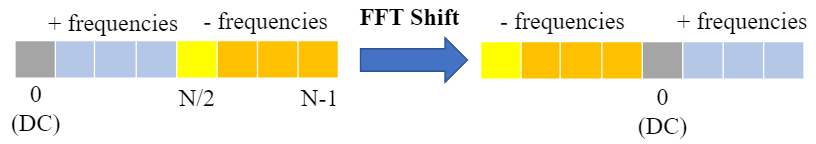

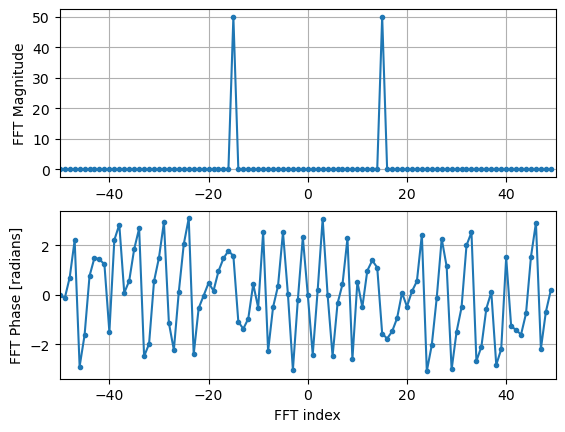

In [98]:
X = np.fft.fftshift(np.fft.fft(x))
k = np.arange(-N/2, N/2)
Xmag = np.abs(X)
Xphase = np.angle(X)

fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(k, Xmag, '.-')
ax0.set_ylabel('FFT Magnitude')
ax0.set_xlim(-N/2, N/2)
ax0.grid()
ax1.plot(k, Xphase, '.-')
ax1.set_ylabel('FFT Phase [radians]')
ax1.set_xlabel('FFT index')
ax1.set_xlim(-N/2, N/2)
ax1.grid()

Escaling the frequency axis...

In [44]:
fs = 1
freq = np.arange(-fs/2, fs/2, fs/N)

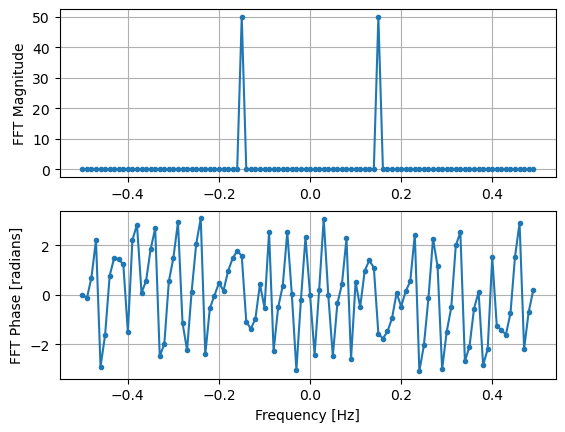

In [49]:
X = np.fft.fftshift(np.fft.fft(x))
Xmag = np.abs(X)
Xphase = np.angle(X)

fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(freq, Xmag, '.-')
ax0.set_ylabel('FFT Magnitude')
ax0.grid()
ax1.plot(freq, Xphase, '.-')
ax1.set_ylabel('FFT Phase [radians]')
ax1.set_xlabel('Frequency [Hz]')
ax1.grid()

# Windowing

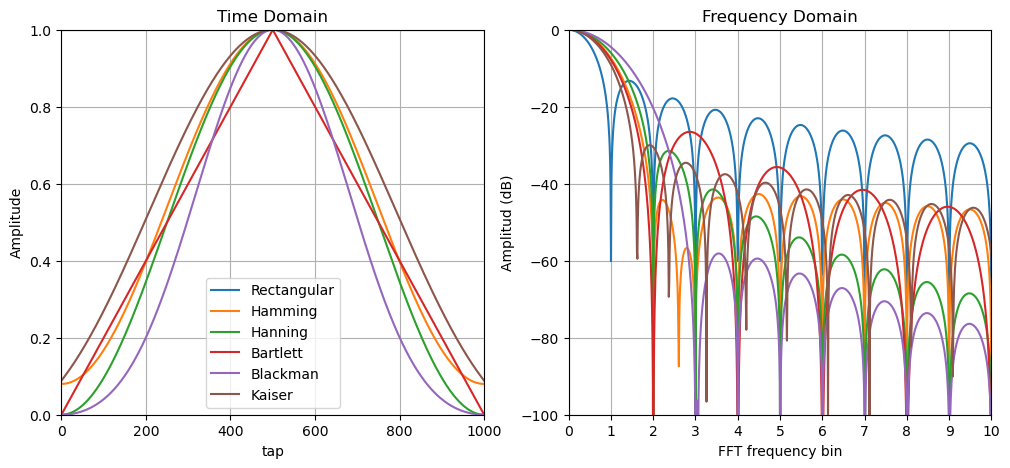

In [258]:
N = 1001
padding = 100*(N - 1)//2
f = N*np.arange(N + 2*padding)/(N + 2*padding)

fig, (ax0, ax1) = plt.subplots(1, 2)
fig.set_size_inches(12,5)

w = np.ones(N)
W = 20*np.log10(abs(np.fft.fft(np.pad(w, padding))/sum(w)))
ax0.plot(w, label='Rectangular')
ax1.plot(f, W, label='Rectangular')

w = np.hamming(N)
W = 20*np.log10(abs(np.fft.fft(np.pad(w, padding))/sum(w)))
ax0.plot(w, label='Hamming')
ax1.plot(f, W, label='Hamming')

w = np.hanning(N)
W = 20*np.log10(abs(np.fft.fft(np.pad(w, padding))/sum(w)))
ax0.plot(w, label='Hanning')
ax1.plot(f, W, label='Hanning')

w = np.bartlett(N)
W = 20*np.log10(abs(np.fft.fft(np.pad(w, padding))/sum(w)))
ax0.plot(w, label='Bartlett')
ax1.plot(f, W, label='Barlett')

w = np.blackman(N)
W = 20*np.log10(abs(np.fft.fft(np.pad(w, padding))/sum(w)))
ax0.plot(w, label='Blackman')
ax1.plot(f, W, label='Blackman')

w = np.kaiser(N, 4)
W = 20*np.log10(abs(np.fft.fft(np.pad(w, padding))/sum(w)))
ax0.plot(w, label='Kaiser')
ax1.plot(f, W, label='Kaiser')

ax0.legend()
ax0.grid()
ax0.set_xlabel('tap')
ax0.set_ylabel('Amplitude')
ax0.set_xlim(0, N-1)
ax0.set_ylim(0, 1)
ax0.set_title('Time Domain')
ax1.set_xlabel('FFT frequency bin')
ax1.set_ylabel('Amplitud (dB)')
ax1.set_title('Frequency Domain')
ax1.set_xlim(0, 10)
ax1.set_ylim(-100, 0)
ax1.set_xticks(np.arange(11))
ax1.grid()
plt.show()

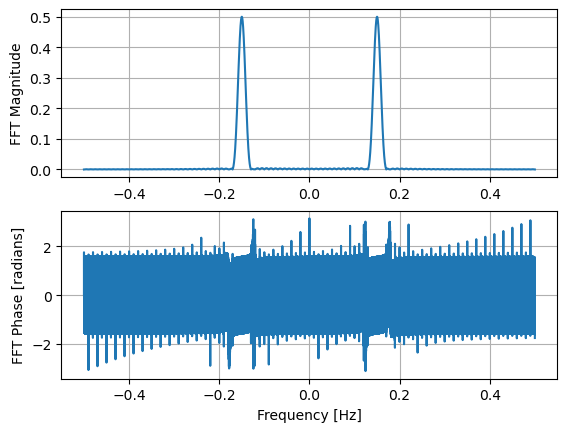

In [284]:
N = 100
padding = 100*(N - 1)//2
fc = 0.15
fs = 1
freq = np.arange(-fs/2, fs/2, fs/(N+2*padding))

k = np.arange(N)
x = np.sin(2*pi*fc*k)
w = np.hamming(N)
X = np.fft.fftshift(np.fft.fft(np.pad(x * w, padding)))/sum(w)
Xmag = np.abs(X)
Xphase = np.angle(X)

fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(freq, Xmag)
ax0.set_ylabel('FFT Magnitude')
ax0.grid()
ax1.plot(freq, Xphase)
ax1.set_ylabel('FFT Phase [radians]')
ax1.set_xlabel('Frequency [Hz]')
ax1.grid()


# Padding

# Spectrogram/Waterfall

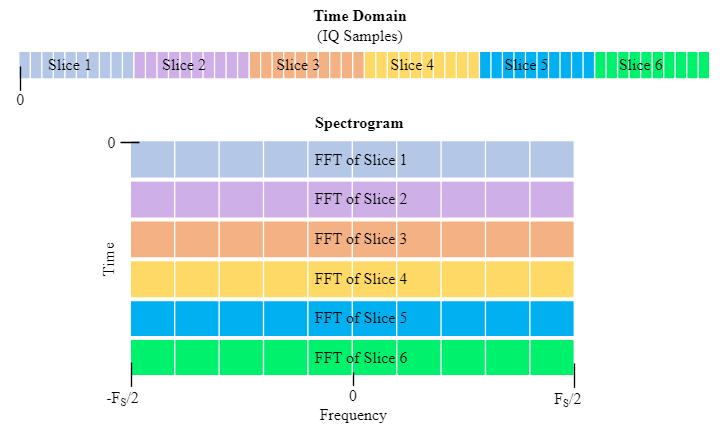

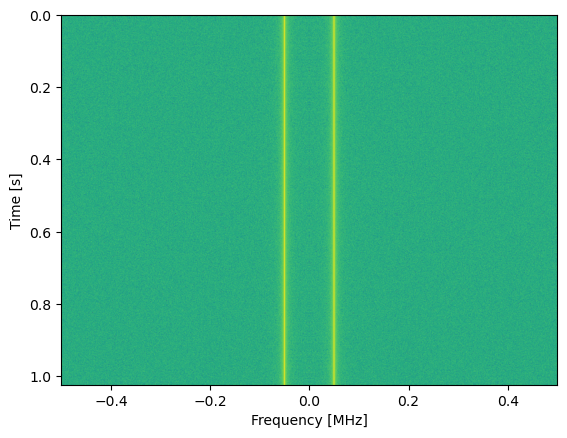

In [51]:
sample_rate = 1e6

# Generate tone plus noise
t = np.arange(1024*1000)/sample_rate # time vector
f = 50e3 # freq of tone
x = np.sin(2*np.pi*f*t) + 0.2*np.random.randn(len(t))
# simulate the signal above, or use your own signal
fft_size = 1024
num_rows = len(x) // fft_size # // is an integer division which rounds down
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)

plt.imshow(spectrogram, aspect='auto', extent = [sample_rate/-2/1e6, sample_rate/2/1e6, len(x)/sample_rate, 0])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()